In [1]:
UNDERPOPULATION = 2
OVERPOPULATION = 3
REPRODUCTION = 3

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
class Cell:
    def __init__(self, x, y, state):
        self.x = x
        self.y = y
        self.state = state
        self.new_state = state

    def update_state(self):
        self.state = self.new_state

In [3]:
dim = (5,5)

In [4]:
universe = []

for x in range(dim[0]):
    inner = []
    for y in range(dim[1]):
        inner.append(Cell(x, y, np.random.randint(0, 2)))
    universe.append(inner)

5

In [78]:
def count_neighbours(universe, cell):
    num_neighbours = 0
    cols = len(universe)
    rows = len(universe[0])
    
    for i in range(cell.x - 1, cell.x + 2):
        for j in range(cell.y - 1, cell.x + 2):
            col = (cell.x + i + cols) % cols
            row = (cell.y + j + rows) % rows
            num_neighbours += universe[col][row].state
    num_neighbours -= cell.state
    return(num_neighbours)

def survival(cell, num_neighbours):

    # Find the number of living neighbours by taking the sum of the 8 surrounding grid squares

    # The rules of Life
    if cell.state and not UNDERPOPULATION <= num_neighbours <= OVERPOPULATION:
        cell.new_state = 0
    elif num_neighbours == REPRODUCTION:
        cell.new_state = 1

def generation(universe):
    # Simple loop over every possible xy coordinate.
    for x in range(len(universe)):
        for y in range(len(universe[0])):
            neighbours = count_neighbours(universe, universe[x][y])
            survival(universe[x][y], neighbours)

    for x in range(len(universe)):
        for y in range(len(universe[0])):
            universe[x][y].update_state()
            
    return universe


5

In [61]:
test = np.zeros((len(universe), len(universe[0])))

In [70]:
for x in range(len(universe)):
    for y in range(len(universe[0])):
        test[x, y] = universe[x][y].state

In [71]:
test

array([[ 1.,  1.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [79]:
generation(universe)

In [80]:
test2 = np.zeros((len(universe), len(universe[0])))
for x in range(len(universe)):
    for y in range(len(universe[0])):
        test2[x, y] = universe[x][y].state

In [81]:
test2

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [9]:
dim = (100, 100)

In [84]:
dim[1]

100

In [85]:
for i in range(dim[0]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [11]:
frame = np.zeros((len(universe), len(universe[0])))
for x in range(len(universe)):
    for y in range(len(universe[0])):
        frame[x, y] = universe[x][y].state

In [12]:
frame

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  1.],
       [ 1.,  1.,  0., ...,  0.,  1.,  1.]])

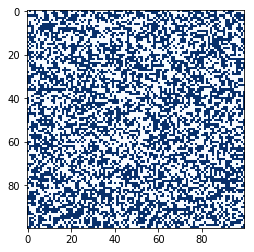

In [14]:
plt.imshow(frame, cmap="Blues")
plt.show()

In [15]:
n_generations = 20
fig = plt.figure()
plt.axis('off')
ims = []

for i in range(n_generations):
    frame = np.zeros((len(universe), len(universe[0])))
    for x in range(len(universe)):
        for y in range(len(universe[0])):
            frame[x, y] = universe[x][y].state
    
    ims.append((plt.imshow(frame, cmap='Blues'),))

In [22]:
ims[10]
%matplotlib inline

In [13]:
def make_array(field):
    frame = np.zeros((len(field), len(field[0])))
    for y in range(len(field)):
        for x in range(len(field[0])):
            frame[x, y] = field[x][y].state
    return frame

In [14]:
array = make_array(universe)

In [16]:
array_list = [array]

In [18]:
array_list.append(array)

In [20]:
len(array_list)

2